To calibrate the camera we need to use information from ~20 chessboard images taken on this camera. We have a banch of chessboard images with 9x6 inner corners, so let's use them to calibrate our camera. On some images has no all 9x6 inner corners visible, so let's use it as test image (calibration-test.jpg)

17
17
17


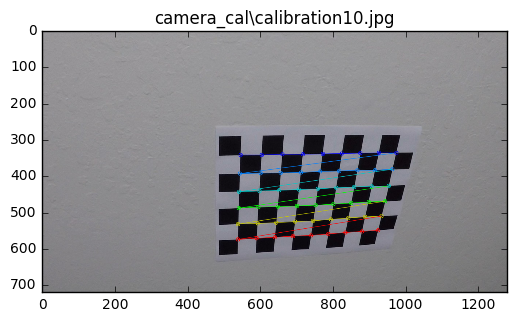

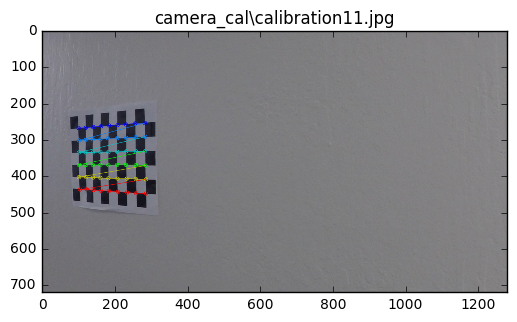

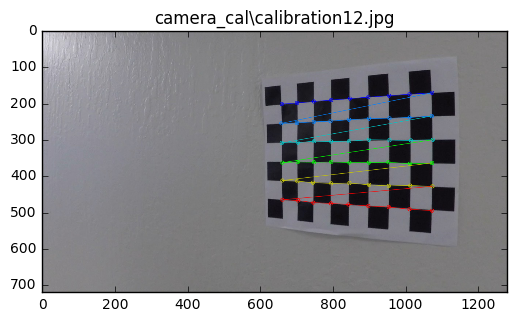

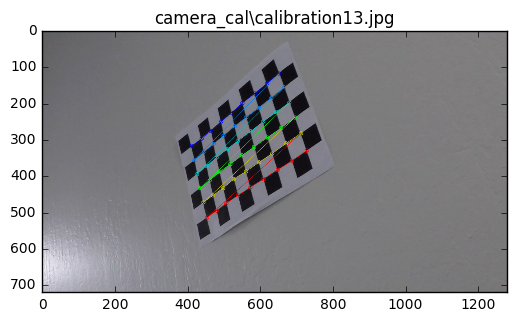

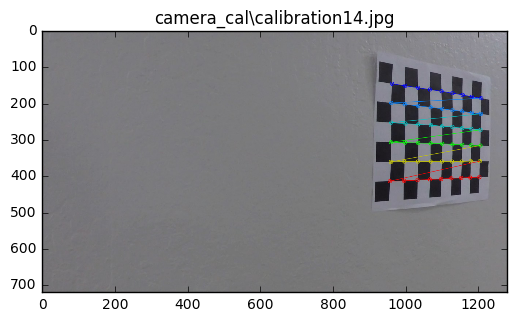

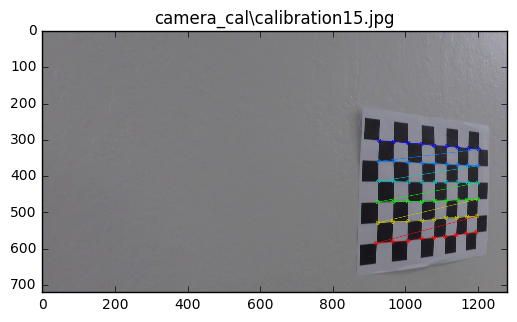

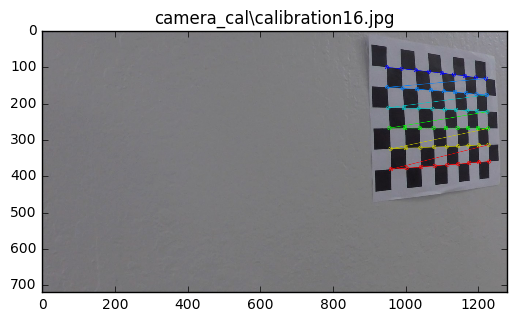

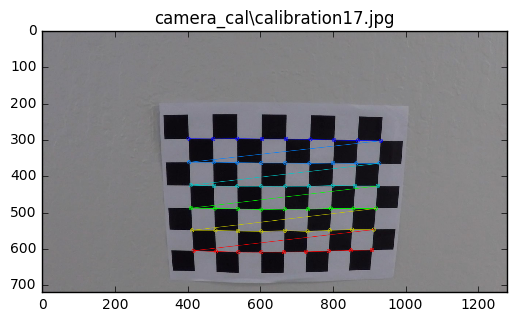

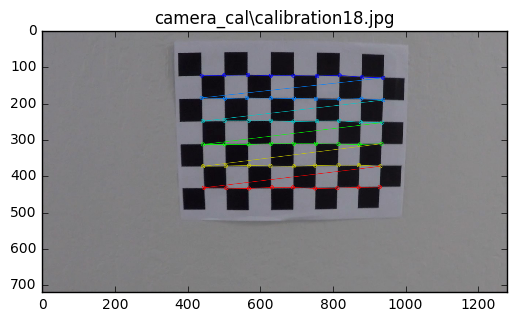

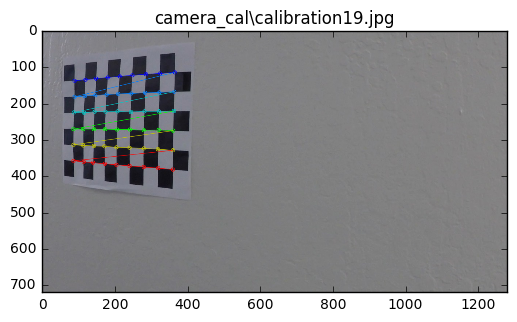

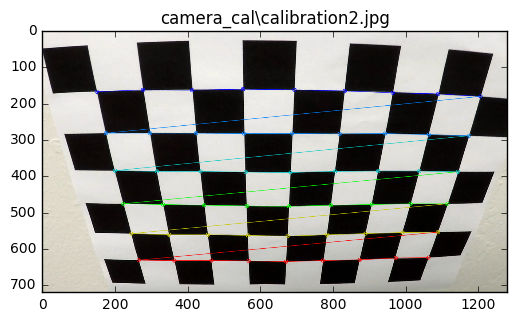

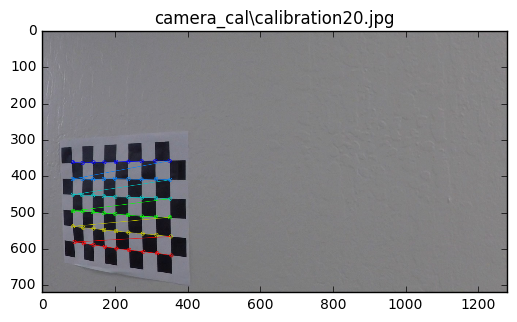

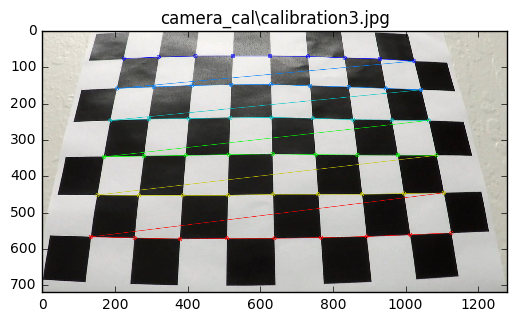

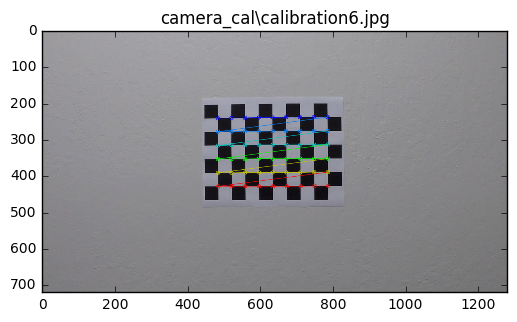

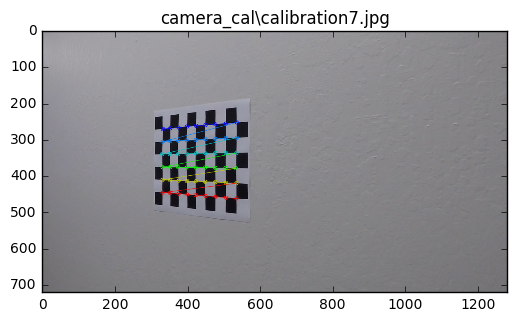

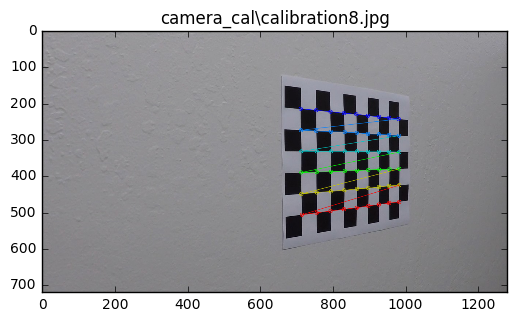

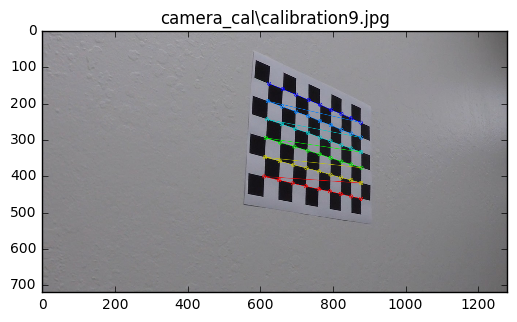

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

nx = 9
ny = 6
corners_shape = (nx, ny)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# since we have the same chessboard, objp are the same for every image
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

images = glob.glob('camera_cal/calibration*.jpg')

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# find corners for every image
for image_name in images:
    img = mpimg.imread(image_name)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, corners_shape, None)

    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(img, corners_shape, corners, ret)
        plt.figure()
        plt.imshow(img)
        plt.title(image_name)
    else:
        plt.figure()
        plt.imshow(img)
        plt.title(image_name)

assert len(objpoints)==len(images)
assert len(imgpoints)==len(images)

Check our camera calibration on test image

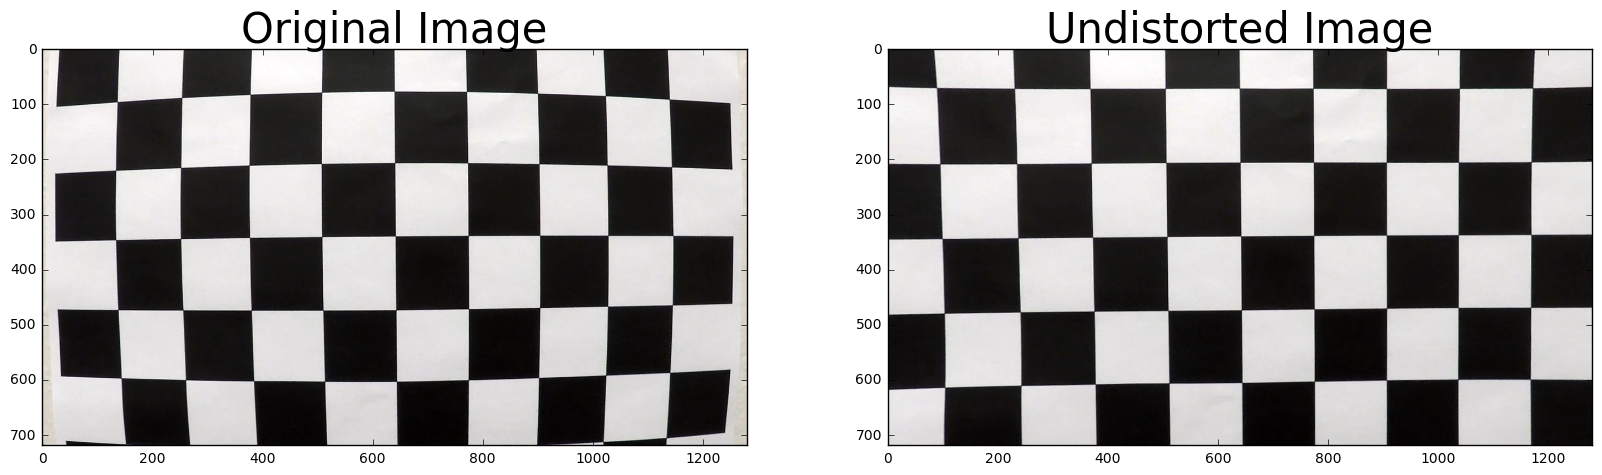

In [17]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = mpimg.imread('camera_cal/test1.jpg')
img_size = (img.shape[0], img.shape[1])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('output_images/undist_test1.jpg', dst)

# Save the camera calibration result for later use
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "dist_pickle.p", "wb" ) )

# show undistorted test image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30);